In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#front, back을 추가했다.
def local(L,i):
  right = i+1
  if right % L == 0:
    right -= L

  left = i-1
  if (left+1) % L == 0:
    left += L

  up = i - L
  if up < 0:
    up += L*L

  down = i + L
  if down >= L*L:
    down -= L*L

  front = i-L*L
  if front < 0:
    front += L*L*L

  back = i+L*L
  if back >= L*L*L:
    back -= L*L*L
  return np.array([right,up,left,down,front,back])

In [3]:
def wolff(S, L, beta, steps):
    P = 1-np.exp(-2*beta)
    m_list=[]

    for t in range(steps):
        r_seed = np.random.randint(0,L*L*L) #랜덤 요소 선택

        cluster=[r_seed]
        nei = [r_seed]

        while nei != []:
          for i in local(L,nei.pop(0)):
            i = int(i)
            if S[i] == S[r_seed]:
              if i not in cluster:
                if np.random.random() < P:

                  cluster = [i]+cluster
                  nei = [i] + nei

        for i in cluster:#클러스트를 뒤집는다
          S[i] *= -1

        m_list.append(abs(np.sum(S)/len(S)))
    return m_list

In [4]:
#0.01부터 0.300까지 0.001간격, 나머지는 0.1간격으로 설정했다
beta_list = list(np.array(range(1,31))*0.01) + list(np.array(range(3,11))*0.1)

In [5]:
L=5
S = np.random.choice([-1,1],L*L*L)

t=10000  #10000개 중 10000-500개를 사용

m_m_list=[]
m_lists=[]
for beta in beta_list:
  print(beta,end=', ')
  m_list = wolff(S, L, beta, 10000)
  m_lists.append(m_list)
  m_m_list.append(abs(sum(m_list[500:])/(t-500))) #같은 행렬을 이어서 쓰기 때문에 앞의 500개 샘플은 제거

0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 

Text(0, 0.5, 'm_mean')

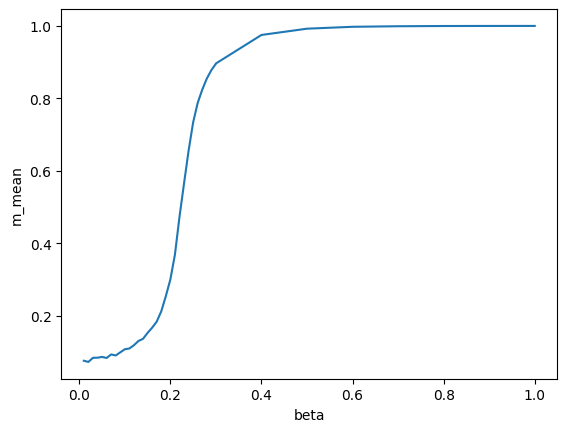

In [6]:
plt.plot(beta_list,m_m_list)
plt.xlabel('beta')
plt.ylabel('m_mean')

2,4,6,8,10,12,14,16,

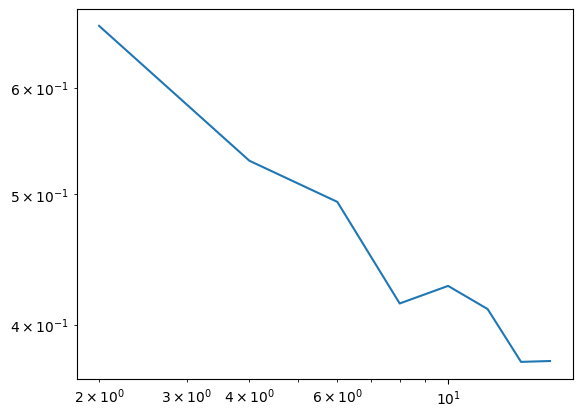

In [13]:
beta_c=0.22

beta_c_list=[]
for L_i in range(2,17,2):
  S = np.random.choice([-1,1],L_i*L_i*L_i)
  m_list = wolff(S, L_i, beta_c, 1000)
  beta_c_list.append(abs(sum(m_list[500:])/(1000-500))) #같은 행렬을 이어서 쓰기 때문에 앞의 500개 샘플은 제거
  print(L_i,end=',')

plt.plot(list(range(2,17,2)), beta_c_list)
plt.xscale('log')
plt.yscale('log')